In [1]:
import arviz as az
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import factorial as fact
from scipy.special import beta, gamma
from scipy import stats as sp
import warnings

In [2]:
fact = np.vectorize(fact)
plt.style.use('arviz-darkgrid')

# Discrete Distributions

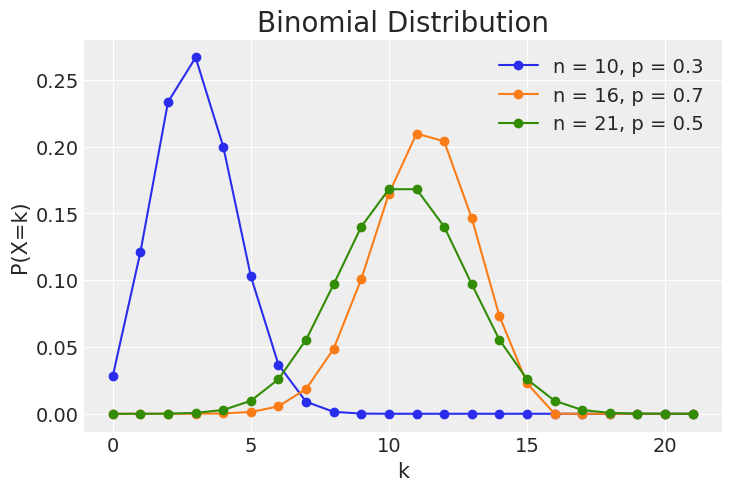

In [3]:
# 1. Binomial Distribution
ns = [10, 16, 21]
ps = [0.3, 0.7, 0.5]
for n, p in zip(ns, ps):
    k = np.arange(0, n)
    q = 1 - p
    pmf = fact(n)/(fact(k) * fact(n-k)) * (p**k) * (q**(n-k))
    k = np.append(k, range(n, 22))
    pmf = np.pad(pmf, (0, 22-n))
    plt.plot(k, pmf, '-o', label=f'n = {n}, p = {p}')
plt.title('Binomial Distribution', fontsize=20)
plt.xlabel('k')
plt.ylabel('P(X=k)')
plt.legend(loc=1)
plt.show()

In [4]:
print("X ~ Bin(n, p) => Mean: np, Variance: npq")
for n, p in zip(ns, ps):
    print(f"X ~ Bin({n}, {p}) => Mean: {n*p}, Variance: {n*p*(1-p):.2f}")

X ~ Bin(n, p) => Mean: np, Variance: npq
X ~ Bin(10, 0.3) => Mean: 3.0, Variance: 2.10
X ~ Bin(16, 0.7) => Mean: 11.2, Variance: 3.36
X ~ Bin(21, 0.5) => Mean: 10.5, Variance: 5.25


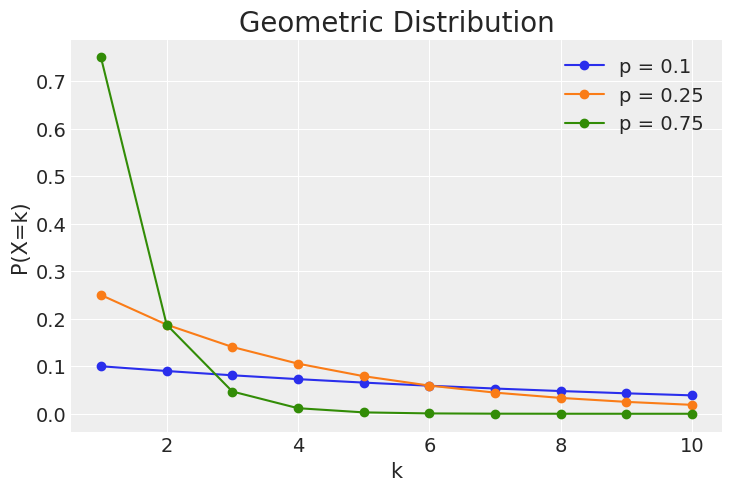

In [5]:
# 2. Geometric Distribution
k = np.arange(1, 11)
for p in [0.1, 0.25, 0.75]:
    q = 1 - p
    pmf = q**(k-1) * p
    plt.plot(k, pmf, '-o', label='p = {}'.format(p))
plt.title('Geometric Distribution', fontsize=20)
plt.xlabel('k')
plt.ylabel('P(X=k)')
plt.legend(loc=1)
plt.show()

In [6]:
print("X ~ Geom(p) => Mean: 1/p, Variance: (1-p)/(p*p)")
for p in [0.1, 0.25, 0.75]:
    print(f"X ~ Geom({p}) => Mean: {1/p:.2f}, Variance: {(1-p)/(p*p):.2f}")

X ~ Geom(p) => Mean: 1/p, Variance: (1-p)/(p*p)
X ~ Geom(0.1) => Mean: 10.00, Variance: 90.00
X ~ Geom(0.25) => Mean: 4.00, Variance: 12.00
X ~ Geom(0.75) => Mean: 1.33, Variance: 0.44


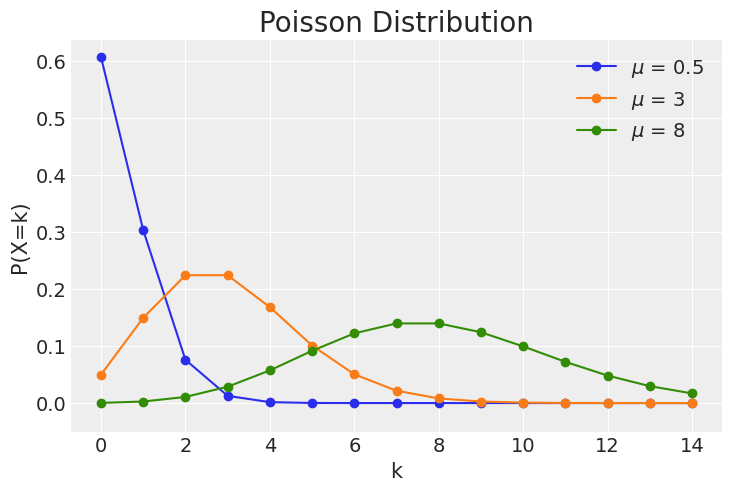

In [7]:
# 3. Poisson Distribution
k = np.arange(0, 15)
for rate in [0.5, 3, 8]:
    pmf = rate**k * np.exp(-1*rate) / fact(k)
    plt.plot(k, pmf, '-o', label='$\mu$ = {}'.format(rate))
plt.title('Poisson Distribution', fontsize=20)
plt.xlabel('k')
plt.ylabel('P(X=k)')
plt.ylim(-.05)
plt.legend(loc=1)
plt.show()

In [8]:
print("X ~ Pois(lambda) => Mean: lambda, Variance: lambda")
for rate in [0.5, 3, 8]:
    print(f"X ~ Pois({rate}) => Mean: {rate:.2f}, Variance: {rate:.2f}")

X ~ Pois(lambda) => Mean: lambda, Variance: lambda
X ~ Pois(0.5) => Mean: 0.50, Variance: 0.50
X ~ Pois(3) => Mean: 3.00, Variance: 3.00
X ~ Pois(8) => Mean: 8.00, Variance: 8.00


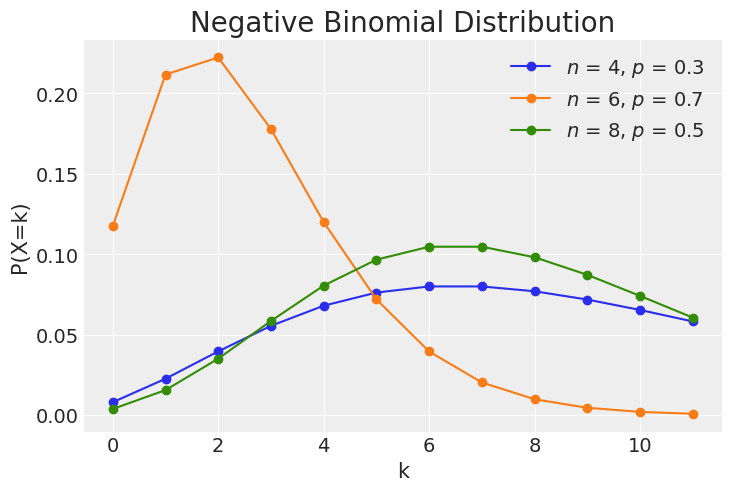

In [9]:
# 4. Negative Binomial Distribution
k = np.arange(0, 12)
ns = [4, 6, 8]
ps = [0.3, 0.7, 0.5]
for n, p in zip(ns, ps):
    q = 1 - p
    pmf = fact(k+n-1) / (fact(n-1) * fact(k)) * (p**n) * (q**k) 
    plt.plot(k, pmf, '-o', label=r'$n$ = {}, $p$ = {}'.format(n, p))
plt.title('Negative Binomial Distribution', fontsize=20)
plt.xlabel('k')
plt.ylabel('P(X=k)')
plt.legend(loc=1)
plt.show()

In [10]:
print("X ~ NB(n, p) => Mean: np/(1-p), Variance: np/(1-p)**2")
for n, p in zip(ns, ps):
    print(f"X ~ NB({n}, {p}) => Mean: {n*p/(1-p):.2f}, Variance: {n*p/((1-p)**2):.2f}")

X ~ NB(n, p) => Mean: np/(1-p), Variance: np/(1-p)**2
X ~ NB(4, 0.3) => Mean: 1.71, Variance: 2.45
X ~ NB(6, 0.7) => Mean: 14.00, Variance: 46.67
X ~ NB(8, 0.5) => Mean: 8.00, Variance: 16.00


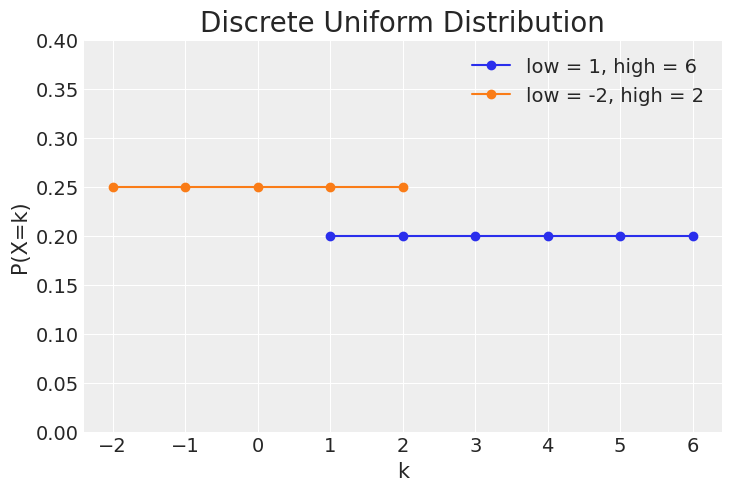

In [11]:
# 5. Discrete Uniform Distribution
lows = [1, -2]
highs = [6, 2]
for low, high in zip(lows, highs):
    x = np.arange(low, high+1)
    pmf = [1 / (high - low)] * len(x)
    plt.plot(x, pmf, '-o', label='low = {}, high = {}'.format(low, high))
plt.title('Discrete Uniform Distribution', fontsize=20)
plt.xlabel('k')
plt.ylabel('P(X=k)')
plt.ylim(0, 0.4)
plt.legend(loc=1)
plt.show()

In [12]:
print("X ~ Unif(low, high) => Mean: (low+high)/2, Variance: ((high-low+1)**2-1) / 12")
for low, high in zip(lows, highs):
    print(f"X ~ Unif({low}, {high}) => Mean: {(low+high)/2:.2f}, Variance: {((high-low+1)**2 - 1) / 12:.2f}")

X ~ Unif(low, high) => Mean: (low+high)/2, Variance: ((high-low+1)**2-1) / 12
X ~ Unif(1, 6) => Mean: 3.50, Variance: 2.92
X ~ Unif(-2, 2) => Mean: 0.00, Variance: 2.00


# Continuous Distributions

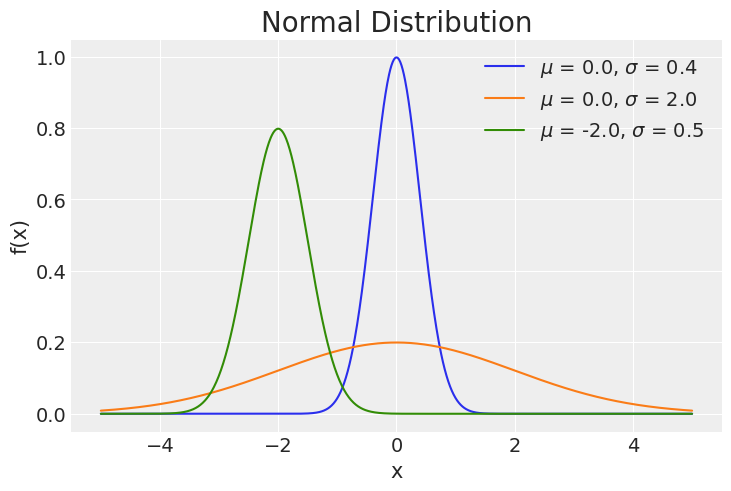

In [13]:
# 1. Normal Distribution
x = np.linspace(-5, 5, 1000)
mus = [0., 0., -2.]
sigmas = [0.4, 2., 0.5]
for mu, sigma in zip(mus, sigmas):
    pdf = np.exp(-1*(((x-mu)/sigma)**2)/2)/(sigma*np.sqrt(2*np.pi))
    plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}'.format(mu, sigma))
plt.title('Normal Distribution', fontsize=20)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc=1)
plt.show()

In [14]:
print("X ~ N(mu, sigma**2) => Mean: mu, Variance: sigma**2")
for mu, sigma in zip(mus, sigmas):
    print(f"X ~ N({mu}, {sigma**2:.2f}) => Mean: {mu:.2f}, Variance: {sigma**2:.2f}")

X ~ N(mu, sigma**2) => Mean: mu, Variance: sigma**2
X ~ N(0.0, 0.16) => Mean: 0.00, Variance: 0.16
X ~ N(0.0, 4.00) => Mean: 0.00, Variance: 4.00
X ~ N(-2.0, 0.25) => Mean: -2.00, Variance: 0.25


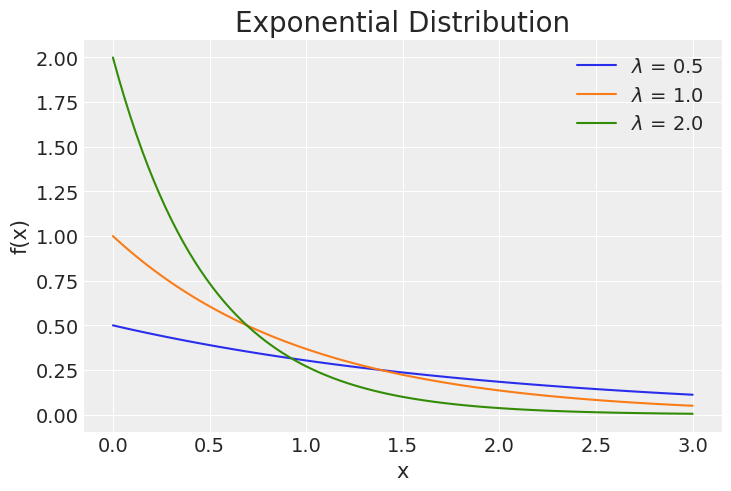

In [15]:
# 2. Exponential Distribution
x = np.linspace(0, 3, 100)
for lam in [0.5, 1., 2.]:
    pdf = lam * np.exp(-lam * x)
    plt.plot(x, pdf, label=r'$\lambda$ = {}'.format(lam))
plt.title('Exponential Distribution', fontsize=20)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc=1)
plt.show()

In [16]:
print("X ~ Expon(lambda) => Mean: 1/lambda, Variance: 1/lambda**2")
for lam in [0.5, 1., 2.]:
    print(f"X ~ Expon({lam}) => Mean: {1/lam:.2f}, Variance: {1/lam**2:.2f}")

X ~ Expon(lambda) => Mean: 1/lambda, Variance: 1/lambda**2
X ~ Expon(0.5) => Mean: 2.00, Variance: 4.00
X ~ Expon(1.0) => Mean: 1.00, Variance: 1.00
X ~ Expon(2.0) => Mean: 0.50, Variance: 0.25


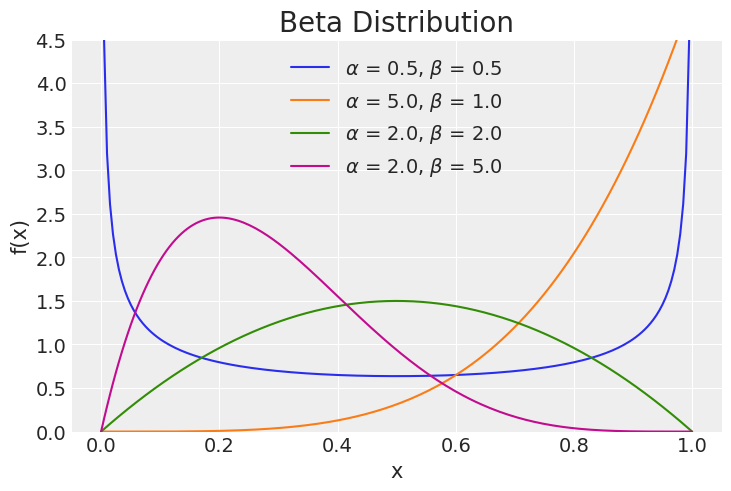

In [17]:
# 3. Beta Distribution
x = np.linspace(0, 1, 200)
alphas = [.5, 5., 2., 2.]
betas = [.5, 1., 2., 5.]
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="divide by zero encountered in power")
    for a, b in zip(alphas, betas):
        pdf = x**(a-1) * (1-x)**(b-1) / beta(a, b)
        plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plt.title('Beta Distribution', fontsize=20)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(0, 4.5)
plt.legend(loc=9)
plt.show()

In [18]:
print("X ~ Beta(alpha, beta) => Mean: alpha/(alpha+beta), Variance: alpha*beta/((alpha+beta)**2 * (alpba+beta+1))")
for a, b in zip(alphas, betas):
    print(f"X ~ Beta({a}, {b:.2f}) => Mean: {a/(a+b):.2f}, Variance: {a*b/((a+b)**2 * (a+b+1)):.2f}")

X ~ Beta(alpha, beta) => Mean: alpha/(alpha+beta), Variance: alpha*beta/((alpha+beta)**2 * (alpba+beta+1))
X ~ Beta(0.5, 0.50) => Mean: 0.50, Variance: 0.12
X ~ Beta(5.0, 1.00) => Mean: 0.83, Variance: 0.02
X ~ Beta(2.0, 2.00) => Mean: 0.50, Variance: 0.05
X ~ Beta(2.0, 5.00) => Mean: 0.29, Variance: 0.03


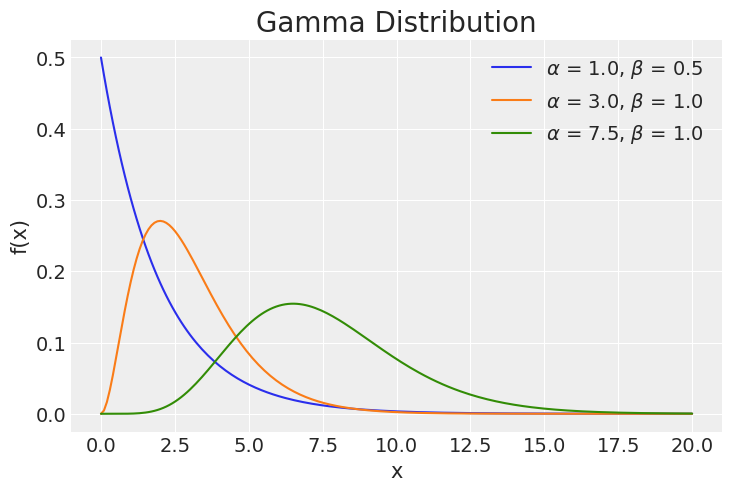

In [19]:
# 4. Gamma Distribution
x = np.linspace(0, 20, 200)
alphas = [1., 3., 7.5]
betas = [.5, 1., 1.]
for a, b in zip(alphas, betas):
    pdf = b**a * x**(a-1) * np.exp(-b*x) / gamma(a)
    plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plt.title('Gamma Distribution', fontsize=20)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc=1)
plt.show()

In [20]:
print("X ~ Gamma(alpha, beta) => Mean: alpha/beta, Variance: alpha/beta**2")
for a, b in zip(alphas, betas):
    print(f"X ~ Gamma({a}, {b:.2f}) => Mean: {a/b:.2f}, Variance: {a/(b**2):.2f}")

X ~ Gamma(alpha, beta) => Mean: alpha/beta, Variance: alpha/beta**2
X ~ Gamma(1.0, 0.50) => Mean: 2.00, Variance: 4.00
X ~ Gamma(3.0, 1.00) => Mean: 3.00, Variance: 3.00
X ~ Gamma(7.5, 1.00) => Mean: 7.50, Variance: 7.50


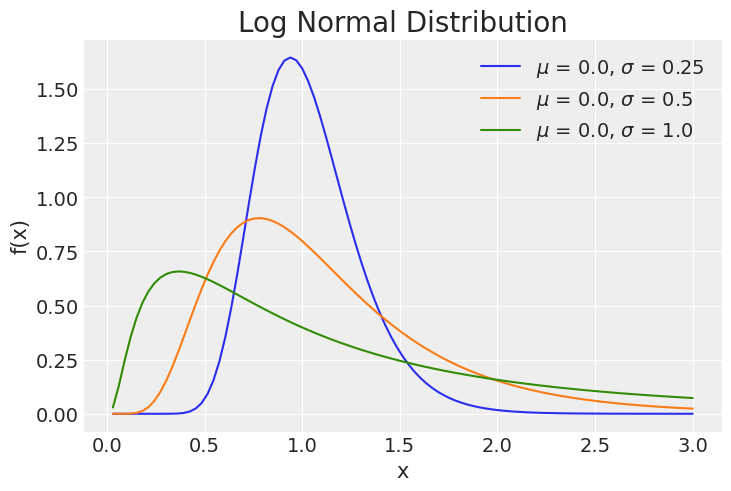

In [21]:
# 5. Log Normal Distribution
x = np.linspace(0, 3, 100)
mus = [0., 0., 0.]
sigmas = [.25, .5, 1.]
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="divide by zero encountered in log")
    warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")
    for mu, sigma in zip(mus, sigmas):
        pdf = np.exp(-1*((np.log(x-mu)/sigma)**2)/2)/(x*sigma*np.sqrt(2*np.pi))
        plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}'.format(mu, sigma))
plt.title('Log Normal Distribution', fontsize=20)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc=1)
plt.show()

In [22]:
print("X ~ LogNorm(mu, sigma**2) => Mean: exp(mu), Variance: [exp(sigma**2)-1]*exp(2mu+sigma**2)")
for mu, sigma in zip(mus, sigmas):
    print(f"X ~ LogNorm({mu}, {sigma**2:.2f}) => Mean: {np.exp(mu):.2f},",
          f"Variance: {(np.exp(sigma**2)-1) * np.exp(2*mu + sigma**2):.2f}")

X ~ LogNorm(mu, sigma**2) => Mean: exp(mu), Variance: [exp(sigma**2)-1]*exp(2mu+sigma**2)
X ~ LogNorm(0.0, 0.06) => Mean: 1.00, Variance: 0.07
X ~ LogNorm(0.0, 0.25) => Mean: 1.00, Variance: 0.36
X ~ LogNorm(0.0, 1.00) => Mean: 1.00, Variance: 4.67


# Part 2

In [23]:
size = 40
sample_size = 1000

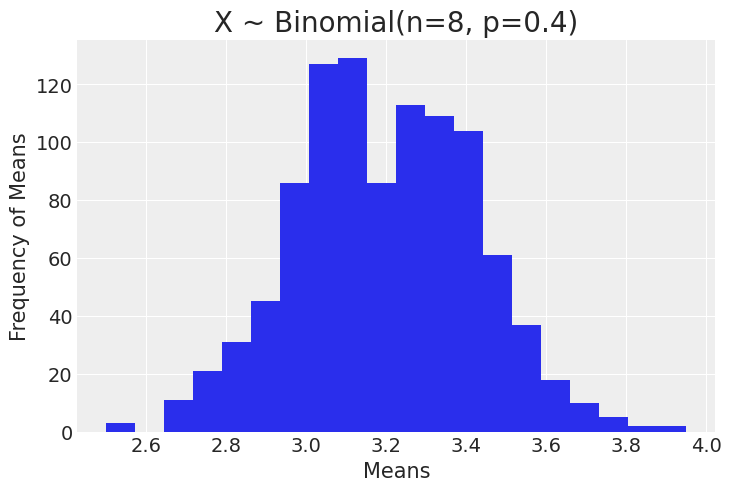

In [24]:
# 1. Binomial Distribution
n = 8
p = 0.4
samples = [np.random.binomial(n, p, size=size) for _ in range(sample_size)]
mean_samples = [np.mean(sample) for sample in samples]
var_samples = [np.var(sample) for sample in samples]
plt.hist(mean_samples, bins=20)
plt.title(f'X ~ Binomial(n={n}, p={p})', fontsize=20)
plt.xlabel('Means')
plt.ylabel('Frequency of Means')
plt.show()

In [25]:
print(f"X ~ Binomial(n={n}, p={p})")
print(f"The statistic sample mean = {np.mean(mean_samples):.3f}, Population mean = {n*p}")
print(f"The variance of sample mean = {np.var(mean_samples):.3f}, Population variance = {n*p*(1-p)}")
print("Yes. The distribution of sample mean is approximately normal.")

X ~ Binomial(n=8, p=0.4)
The statistic sample mean = 3.196, Population mean = 3.2
The variance of sample mean = 0.049, Population variance = 1.92
Yes. The distribution of sample mean is approximately normal.


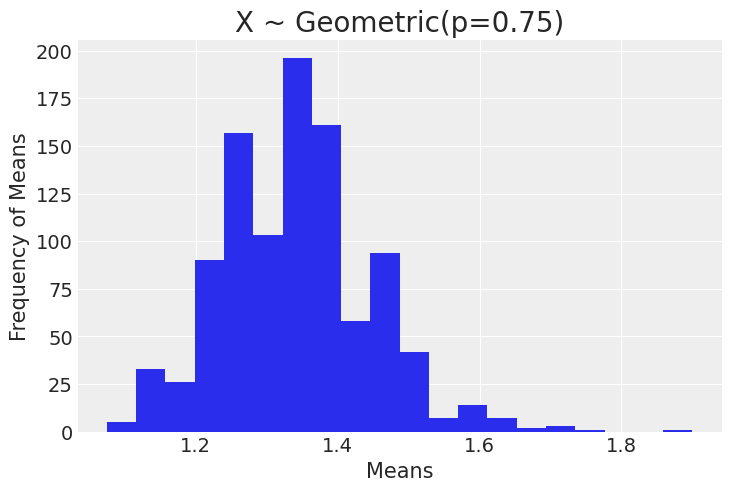

In [26]:
# 2. Geometric Distribution
p = 0.75
samples = [np.random.geometric(p, size=size) for _ in range(sample_size)]
mean_samples = [np.mean(sample) for sample in samples]
var_samples = [np.var(sample) for sample in samples]
plt.hist(mean_samples, bins=20)
plt.title(f'X ~ Geometric(p={p})', fontsize=20)
plt.xlabel('Means')
plt.ylabel('Frequency of Means')
plt.show()

In [27]:
print(f"X ~ Geometric(p={p})")
print(f"The statistic sample mean = {np.mean(mean_samples):.3f}, Population mean = {1/p:.3f}")
print(f"The variance of sample mean = {np.var(mean_samples):.3f}, Population variance = {(1-p)/(p*p):.2f}")
print("Yes. The distribution of sample mean is approximately normal.")

X ~ Geometric(p=0.75)
The statistic sample mean = 1.340, Population mean = 1.333
The variance of sample mean = 0.011, Population variance = 0.44
Yes. The distribution of sample mean is approximately normal.


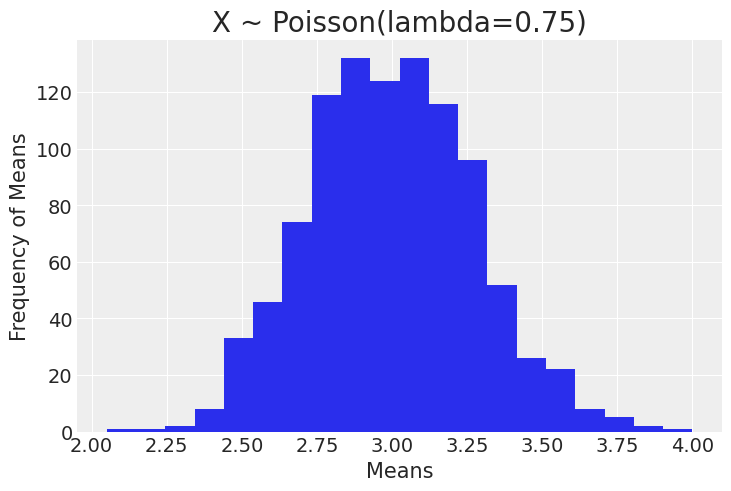

In [28]:
# 3. Poisson Distribution
lam = 3.0
samples = [np.random.poisson(lam, size=size) for _ in range(sample_size)]
mean_samples = [np.mean(sample) for sample in samples]
var_samples = [np.var(sample) for sample in samples]
plt.hist(mean_samples, bins=20)
plt.title(f'X ~ Poisson(lambda={p})', fontsize=20)
plt.xlabel('Means')
plt.ylabel('Frequency of Means')
plt.show()

In [29]:
print(f"X ~ Poisson(lambda={p})")
print(f"The statistic sample mean = {np.mean(mean_samples):.3f}, Population mean = {lam:.3f}")
print(f"The variance of sample mean = {np.var(mean_samples):.3f}, Population variance = {lam:.2f}")
print("Yes. The distribution of sample mean is approximately normal.")

X ~ Poisson(lambda=0.75)
The statistic sample mean = 2.997, Population mean = 3.000
The variance of sample mean = 0.074, Population variance = 3.00
Yes. The distribution of sample mean is approximately normal.


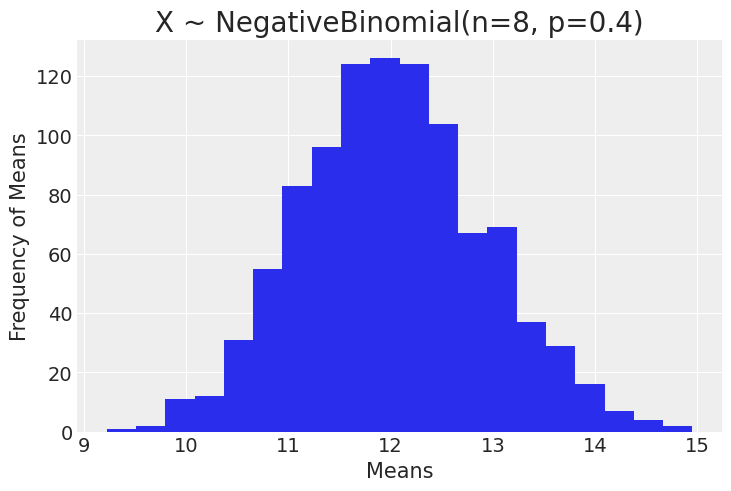

In [30]:
# 4. Negative Binomial Distribution
n = 8
p = 0.4
samples = [sp.nbinom.rvs(n, p, size=size) for _ in range(sample_size)]
mean_samples = [np.mean(sample) for sample in samples]
var_samples = [np.var(sample) for sample in samples]
plt.hist(mean_samples, bins=20)
plt.title(f'X ~ NegativeBinomial(n={n}, p={p})', fontsize=20)
plt.xlabel('Means')
plt.ylabel('Frequency of Means')
plt.show()

In [31]:
print(f"X ~ NegativeBinomial(n={n}, p={p})")
print(f"The statistic sample mean = {np.mean(5.33):.3f}, Population mean = {n*p/(1-p):.2f}")
print(f"The variance of sample mean = {np.var(mean_samples):.3f}, Population variance = {n*p/((1-p)**2):.2f}")
print("Yes. The distribution of sample mean is approximately normal.")

X ~ NegativeBinomial(n=8, p=0.4)
The statistic sample mean = 5.330, Population mean = 5.33
The variance of sample mean = 0.806, Population variance = 8.89
Yes. The distribution of sample mean is approximately normal.


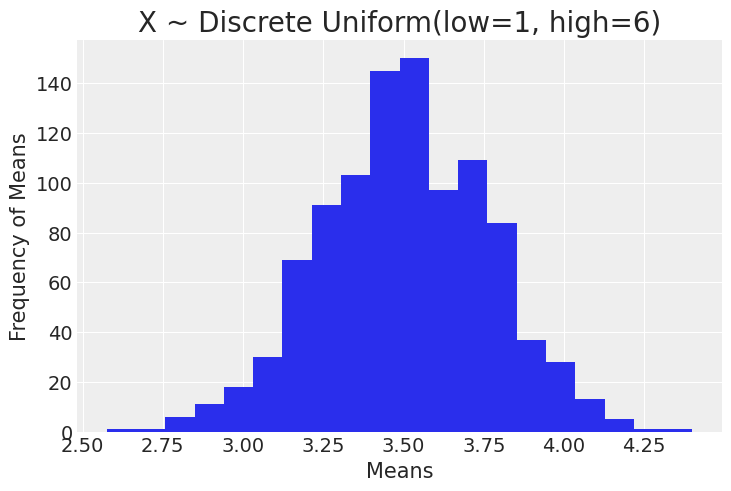

In [32]:
# 5. Discrete Uniform Distribution
low = 1
high = 6
samples = [np.random.choice(np.arange(low, high+1), size=size) for _ in range(sample_size)]
mean_samples = [np.mean(sample) for sample in samples]
var_samples = [np.var(sample) for sample in samples]
plt.hist(mean_samples, bins=20)
plt.title(f'X ~ Discrete Uniform(low={low}, high={high})', fontsize=20)
plt.xlabel('Means')
plt.ylabel('Frequency of Means')
plt.show()

In [33]:
print(f"X ~ DiscreteUniform(low={low}, high={high})")
print(f"The statistic sample mean = {np.mean(mean_samples):.3f}, Population mean = {(low+high)/2:.2f}")
print(f"The variance of sample mean = {np.var(mean_samples):.3f}, Population variance = {((high-low+1)**2 - 1) / 12:.2f}")
print("Yes. The distribution of sample mean is approximately normal.")

X ~ DiscreteUniform(low=1, high=6)
The statistic sample mean = 3.504, Population mean = 3.50
The variance of sample mean = 0.070, Population variance = 2.92
Yes. The distribution of sample mean is approximately normal.


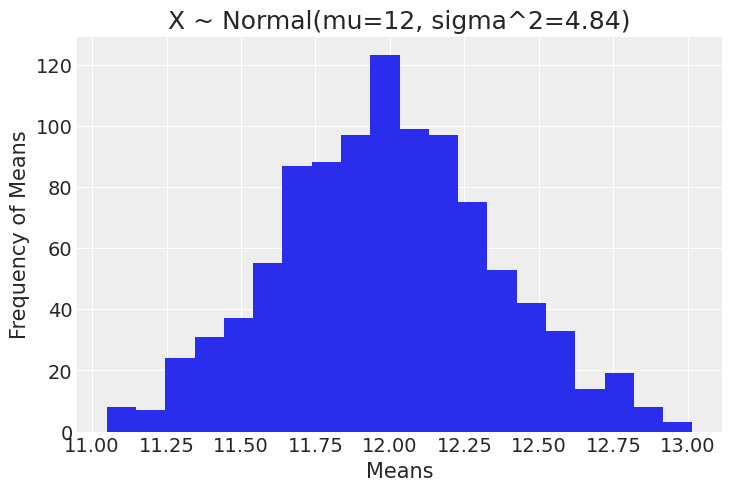

In [34]:
# 6. Normal Distribution
mu = 12
sigma = 2.2
samples = [np.random.normal(mu, sigma, size=size) for _ in range(sample_size)]
mean_samples = [np.mean(sample) for sample in samples]
var_samples = [np.var(sample) for sample in samples]
plt.hist(mean_samples, bins=20)
plt.title(f'X ~ Normal(mu={mu}, sigma^2={sigma**2:.2f})', fontsize=18)
plt.xlabel('Means')
plt.ylabel('Frequency of Means')
plt.show()

In [35]:
print(f"X ~ Normal(mu={mu}, sigma^2={2.2**2:.2f})")
print(f"The statistic sample mean = {np.mean(mean_samples):.3f}, Population mean = {mu:.2f}")
print(f"The variance of sample mean = {np.var(mean_samples):.3f}, Population variance = {sigma**2:.2f}")
print("Yes. The distribution of sample mean is approximately normal.")

X ~ Normal(mu=12, sigma^2=4.84)
The statistic sample mean = 11.989, Population mean = 12.00
The variance of sample mean = 0.129, Population variance = 4.84
Yes. The distribution of sample mean is approximately normal.


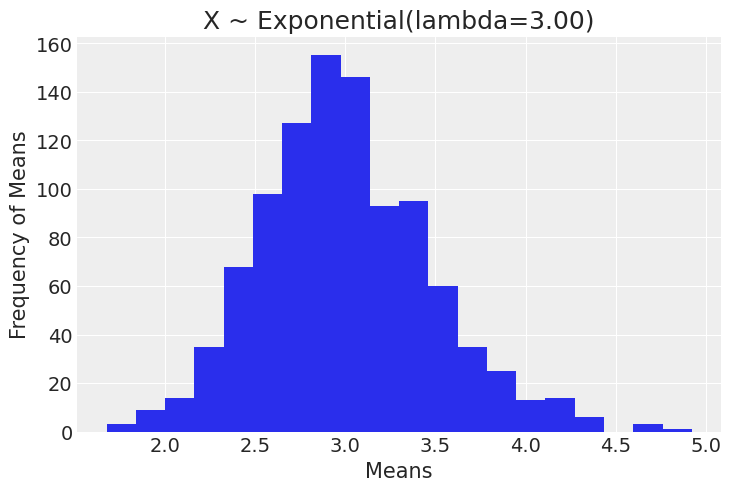

In [36]:
# 7. Exponential Distribution
scale = 3.
samples = [np.random.exponential(scale, size=size) for _ in range(sample_size)]
mean_samples = [np.mean(sample) for sample in samples]
var_samples = [np.var(sample) for sample in samples]
plt.hist(mean_samples, bins=20)
plt.title(f'X ~ Exponential(lambda={scale:.2f})', fontsize=18)
plt.xlabel('Means')
plt.ylabel('Frequency of Means')
plt.show()

In [37]:
print(f"X ~ Exponential(lambda={scale:.2f})")
print(f"The statistic sample mean = {np.mean(mean_samples):.3f}, Population mean = {scale:.2f}")
print(f"The variance of sample mean = {np.var(mean_samples):.3f}, Population variance = {1/scale**2:.2f}")
print("Yes. The distribution of sample mean is approximately normal.")

X ~ Exponential(lambda=3.00)
The statistic sample mean = 3.001, Population mean = 3.00
The variance of sample mean = 0.227, Population variance = 0.11
Yes. The distribution of sample mean is approximately normal.


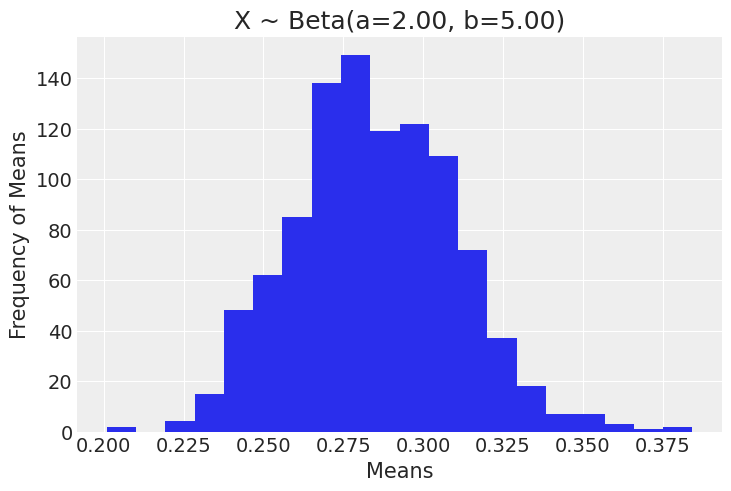

In [38]:
# 8. Beta Distribution
a = 2.
b = 5.
samples = [np.random.beta(a, b, size=size) for _ in range(sample_size)]
mean_samples = [np.mean(sample) for sample in samples]
var_samples = [np.var(sample) for sample in samples]
plt.hist(mean_samples, bins=20)
plt.title(f'X ~ Beta(a={a:.2f}, b={b:.2f})', fontsize=18)
plt.xlabel('Means')
plt.ylabel('Frequency of Means')
plt.show()

In [39]:
print(f"X ~ Beta(a={a:.2f}, b={b:.2f})")
print(f"The statistic sample mean = {np.mean(mean_samples):.3f}, Population mean = {a/(a+b):.2f}")
print(f"The variance of sample mean = {np.var(mean_samples):.3f}, Population variance = {a*b/((a+b)**2 * (a+b+1)):.2f}")
print("Yes. The distribution of sample mean is approximately normal.")

X ~ Beta(a=2.00, b=5.00)
The statistic sample mean = 0.285, Population mean = 0.29
The variance of sample mean = 0.001, Population variance = 0.03
Yes. The distribution of sample mean is approximately normal.


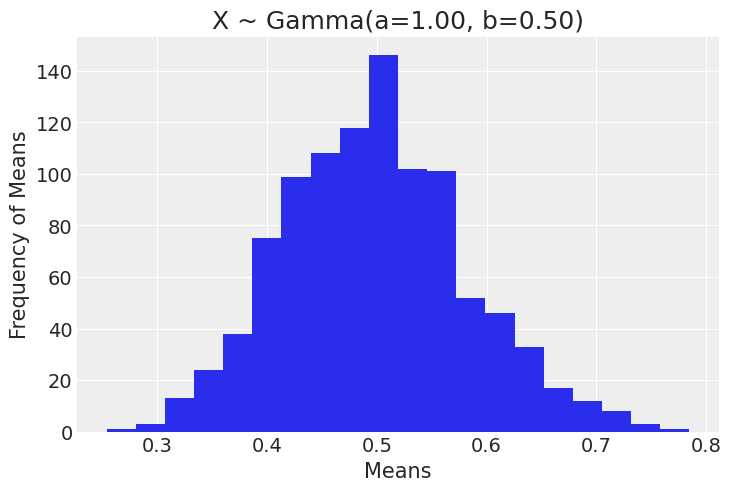

In [40]:
# 9. Gamma Distribution
a = 1.
b = 0.5
samples = [np.random.gamma(a, b, size=size) for _ in range(sample_size)]
mean_samples = [np.mean(sample) for sample in samples]
var_samples = [np.var(sample) for sample in samples]
plt.hist(mean_samples, bins=20)
plt.title(f'X ~ Gamma(a={a:.2f}, b={b:.2f})', fontsize=18)
plt.xlabel('Means')
plt.ylabel('Frequency of Means')
plt.show()

In [41]:
print(f"X ~ Gamma(a={a:.2f}, b={b:.2f})")
print(f"The statistic sample mean = {np.mean(mean_samples):.3f}, Population mean = {b/a:.2f}")
print(f"The variance of sample mean = {np.var(mean_samples):.3f}, Population variance = {a/(b**2):.2f}")
print("Yes. The distribution of sample mean is approximately normal.")

X ~ Gamma(a=1.00, b=0.50)
The statistic sample mean = 0.499, Population mean = 0.50
The variance of sample mean = 0.007, Population variance = 4.00
Yes. The distribution of sample mean is approximately normal.


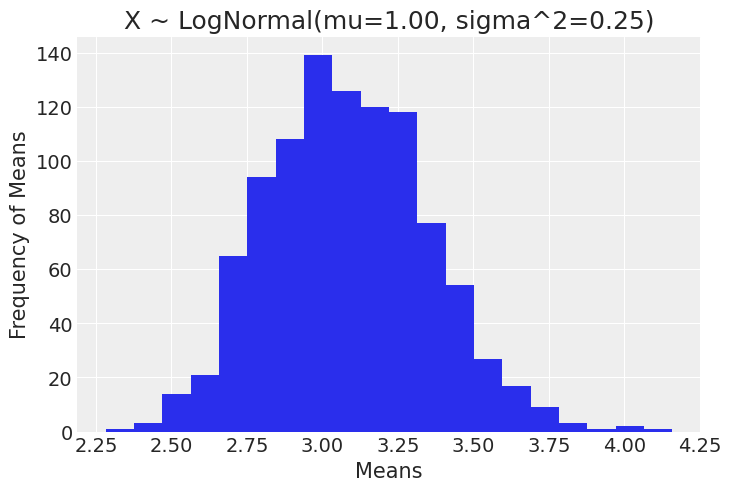

In [42]:
# 10. Log Normal Distribution
mu = 1.
sigma = 0.5
samples = [np.random.lognormal(a, b, size=size) for _ in range(sample_size)]
mean_samples = [np.mean(sample) for sample in samples]
var_samples = [np.var(sample) for sample in samples]
plt.hist(mean_samples, bins=20)
plt.title(f'X ~ LogNormal(mu={mu:.2f}, sigma^2={sigma**2:.2f})', fontsize=18)
plt.xlabel('Means')
plt.ylabel('Frequency of Means')
plt.show()

In [43]:
print(f"X ~ LogNormal(mu={mu:.2f}, sigma^2={sigma**2:.2f})")
print(f"The statistic sample mean = {np.mean(mean_samples):.3f}, Population mean = {np.exp(mu):.2f}")
print(f"The variance of sample mean = {np.var(mean_samples):.3f}, Population variance = {(np.exp(sigma**2)-1) * np.exp(2*mu + sigma**2):.2f}")
print("Yes. The distribution of sample mean is approximately normal.")

X ~ LogNormal(mu=1.00, sigma^2=0.25)
The statistic sample mean = 3.084, Population mean = 2.72
The variance of sample mean = 0.071, Population variance = 2.69
Yes. The distribution of sample mean is approximately normal.
